# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = 2\,(Ax - y)^\top A $$
$$ \nabla f(x) = 2\,A^\top(Ax - y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2\,A^\top(Ax - y)  = 0$$
$$  x = (A^\top A)^{-1}A^\top y $$

### 2.1 Реализация прямого решения

In [84]:
!!pip install matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt

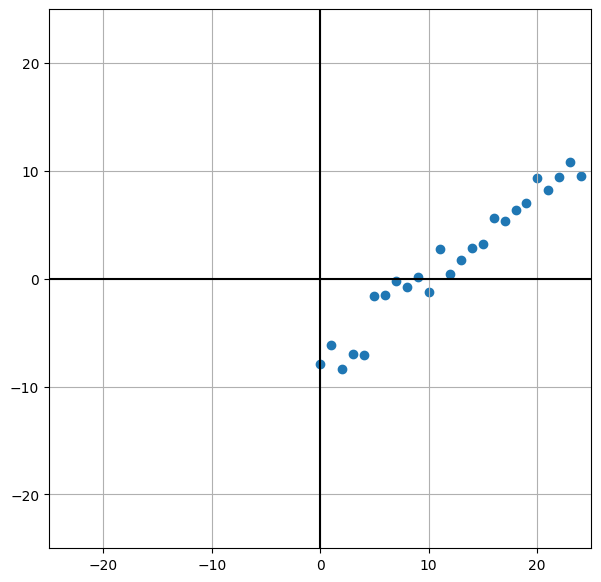

In [85]:
# ваши параметры по вариантам
a_orig = 0.8 # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = -8 # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = 8 # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [86]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([-7.90879528, -6.10871727, -8.34697031, -6.98634953, -7.09649157,
        -1.5901657 , -1.47216383, -0.19544372, -0.80517236,  0.1764211 ,
        -1.18342715,  2.71636361,  0.4766732 ,  1.73596453,  2.82164143,
         3.20838473,  5.65954811,  5.369211  ,  6.33433897,  6.99136377,
         9.34686857,  8.1930472 ,  9.42575179, 10.82405142,  9.5540099 ]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

Потому что
$$
y = [x,\,1]\begin{pmatrix}a\\b\end{pmatrix}.
$$

In [ ]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_analytical, b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
(a_analytical, b_analytical)

(np.float64(0.7834002291791331), np.float64(-7.755205045988093))

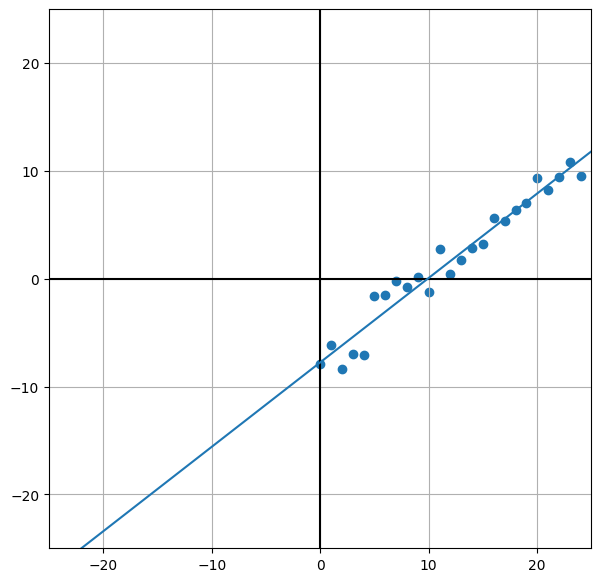

In [102]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
x1, x2 = -25, 25
y1 = a_analytical * x1 + b_analytical
y2 = a_analytical * x2 + b_analytical

ax.plot([x1,x2], [y1, y2])

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

In [89]:
eigs = np.linalg.eigvalsh(2 * A.T @ A) 
lambda_max = eigs.max()
print("λ_max(H) =", lambda_max)
print("α_max =", 1 / lambda_max)


λ_max(H) = 9836.784299009883
α_max = 0.00010165923838552143


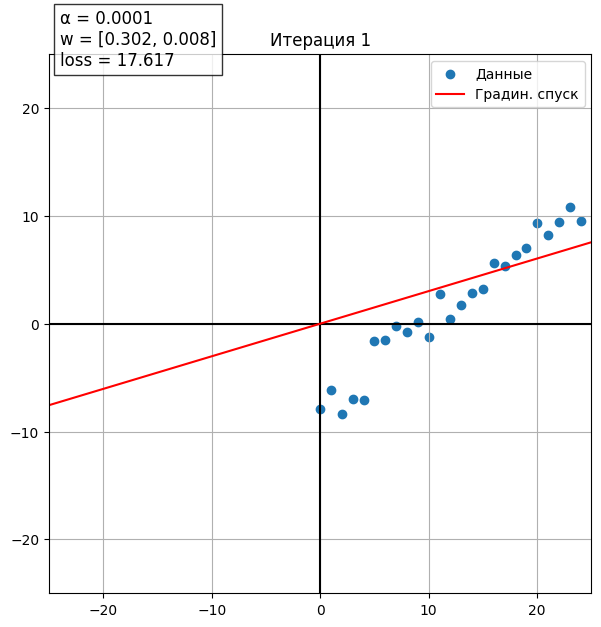

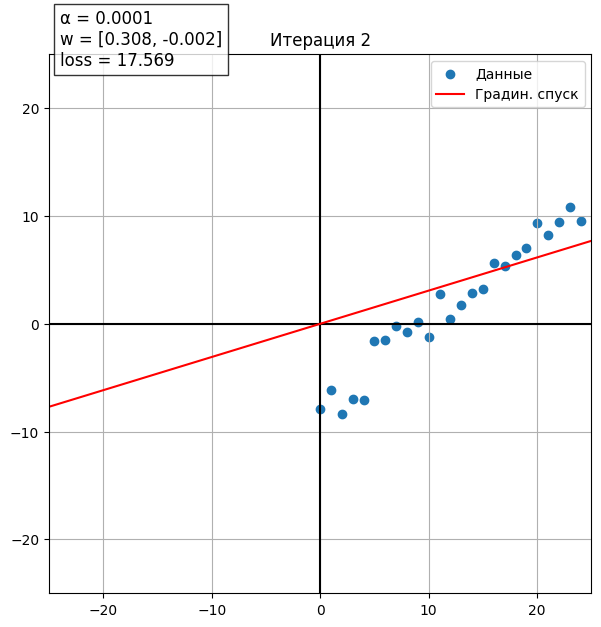

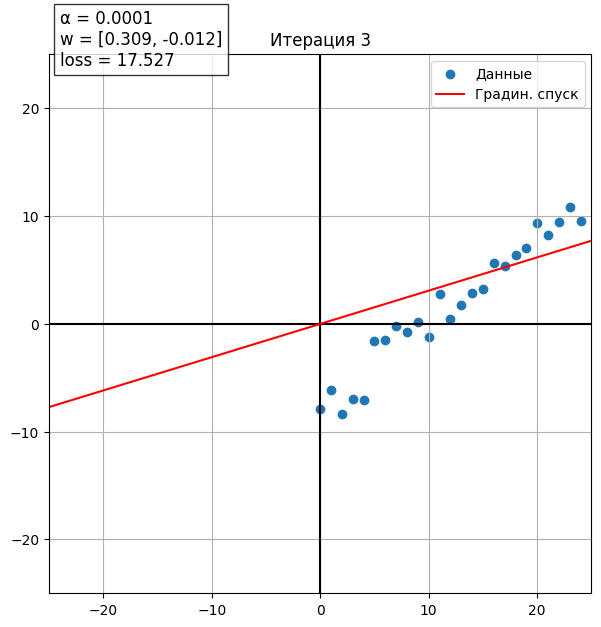

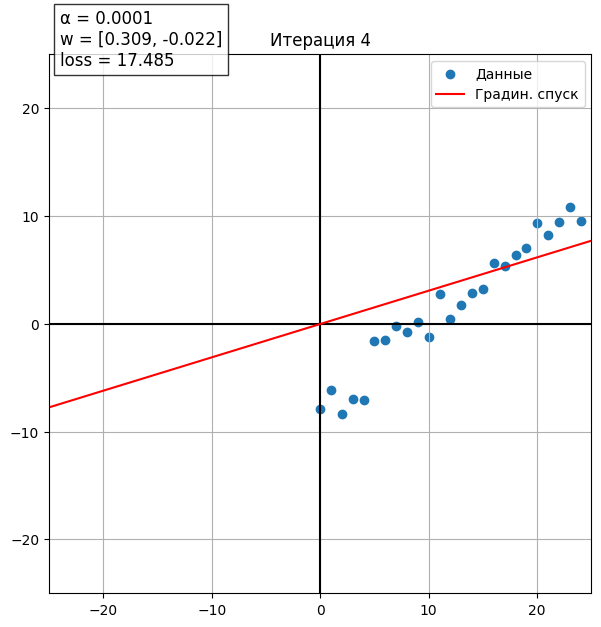

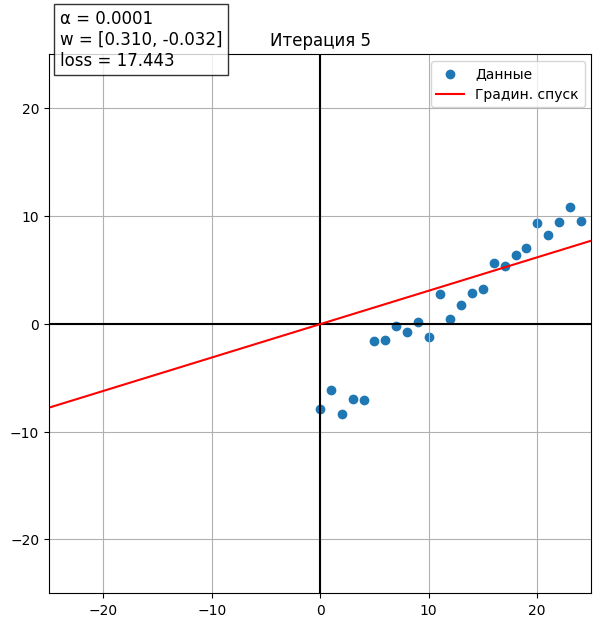

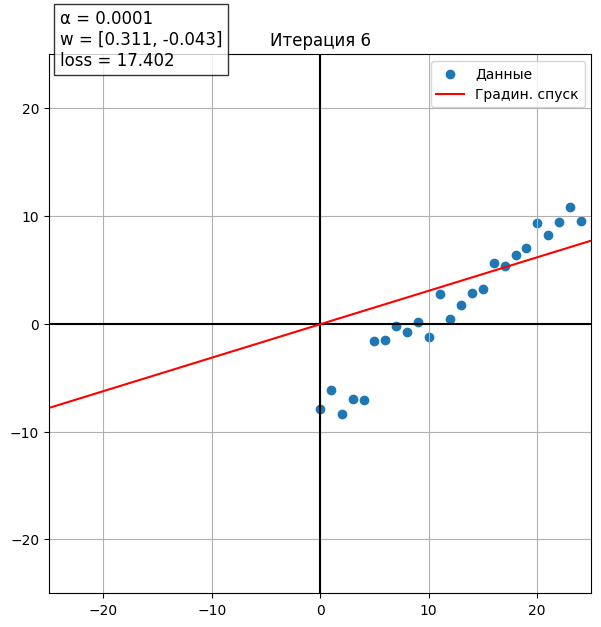

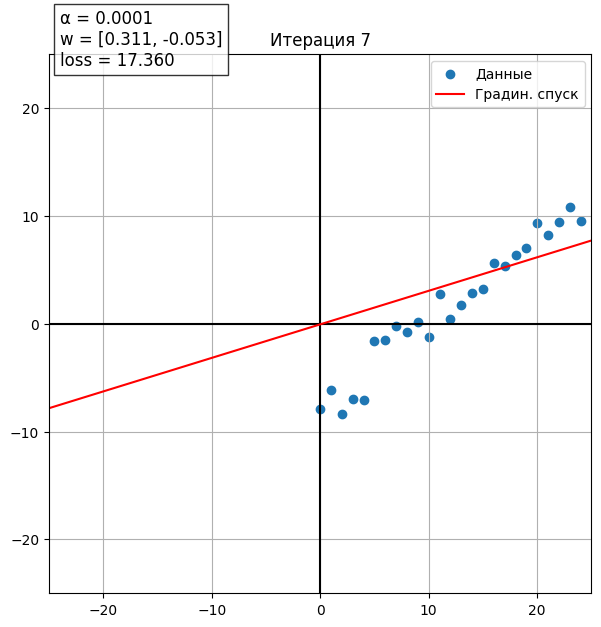

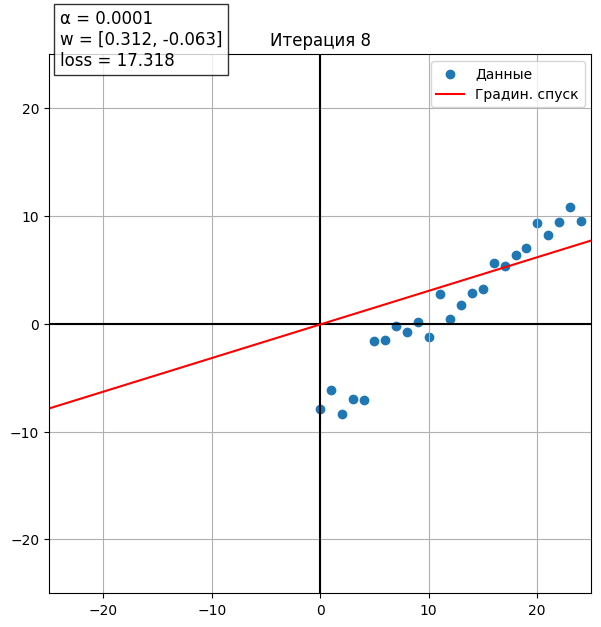

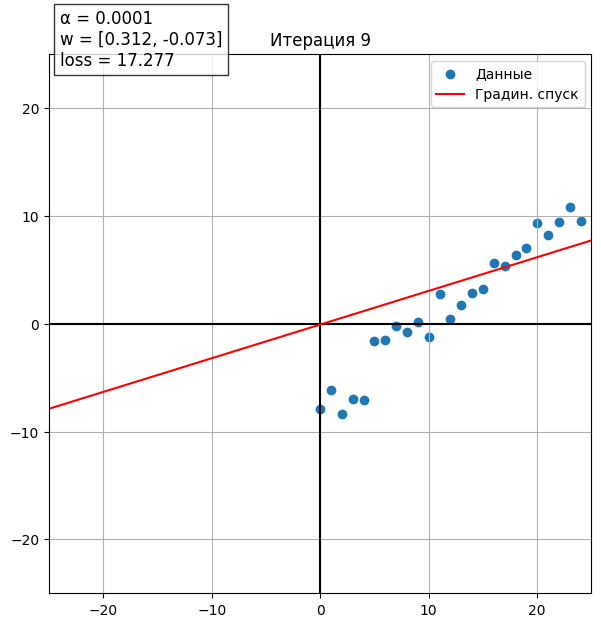

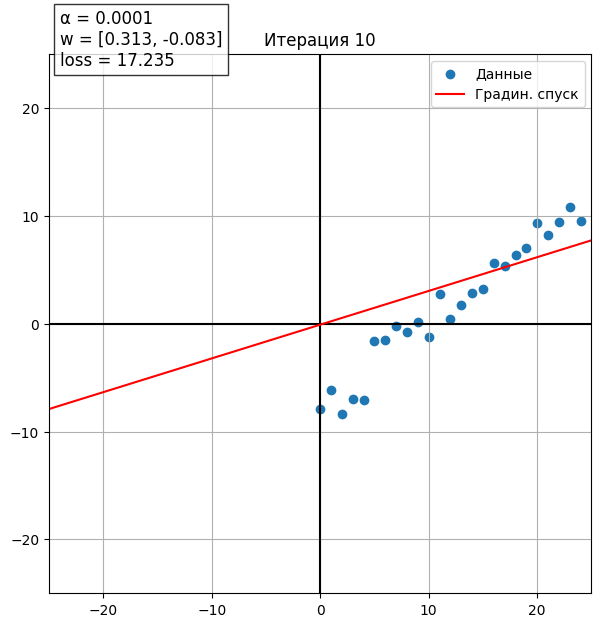

array([ 0.31305879, -0.08332131])

In [101]:
alpha = 0.0001
num_iter = 10

w = np.array([0.0, 0.0])

for i in range(num_iter):
    # 1) получаем градиент
    grad = 2 * A.T @ (A @ w - y)
    # 2) получаем антиградиент и обновляем параметры
    w += -grad * alpha
    # print(grad, w)

    # mse
    loss = np.mean((A @ w - y) ** 2)

    # if (i + 1) % 200 == 0:
    # Рисуем результат текущего шага
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(A[:, 0], y, label='Данные')
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.axvline(0, color='black')
    ax.axhline(0, color='black')
    ax.grid(True)

    x1, x2 = -25, 25
    y1 = w[0] * x1 + w[1]
    y2 = w[0] * x2 + w[1]
    ax.plot([x1, x2], [y1, y2], 'r-', label='Градин. спуск')

    text_str = (
        f'α = {alpha:.4f}\n'
        f'w = [{w[0]:.3f}, {w[1]:.3f}]\n'
        f'loss = {loss:.3f}'
    )
    ax.text(
        -24, 24, text_str,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8)
    )

    ax.set_title(f'Итерация {i+1}')
    ax.legend()
    plt.show()


w

### Тот же learning rate, но 2000 итераций

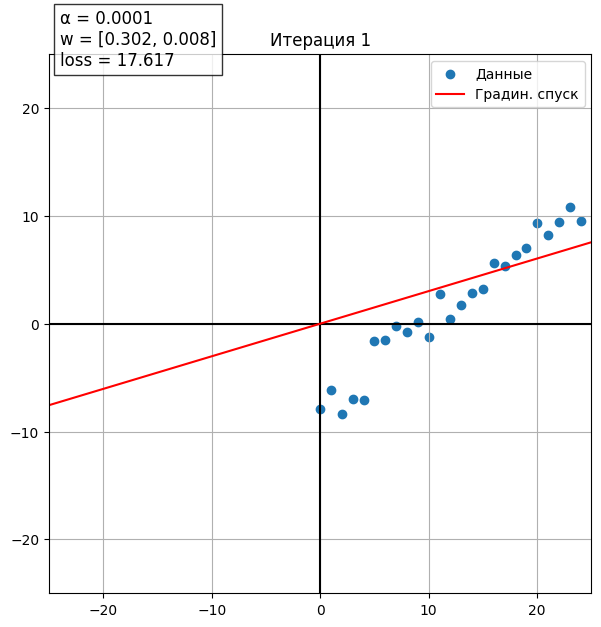

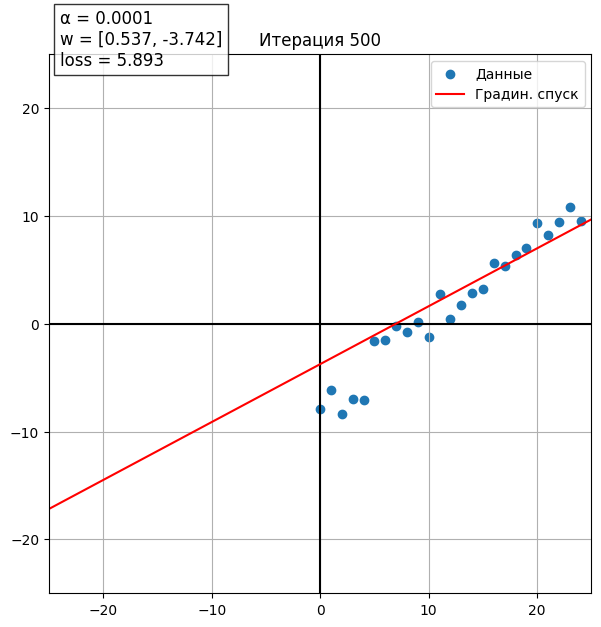

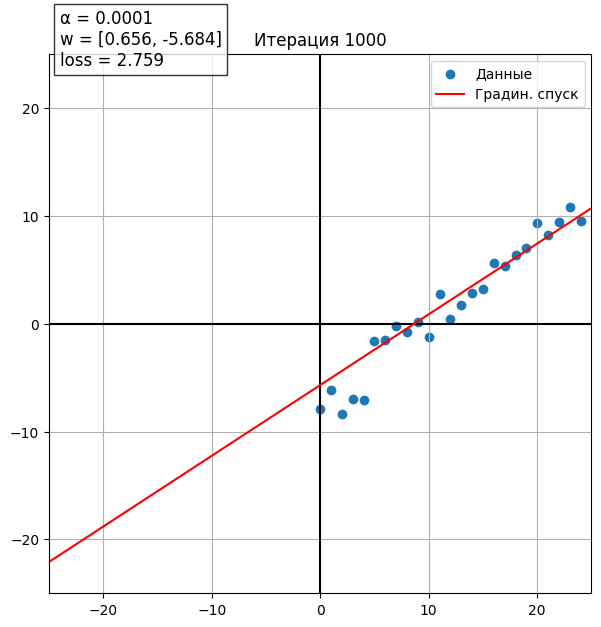

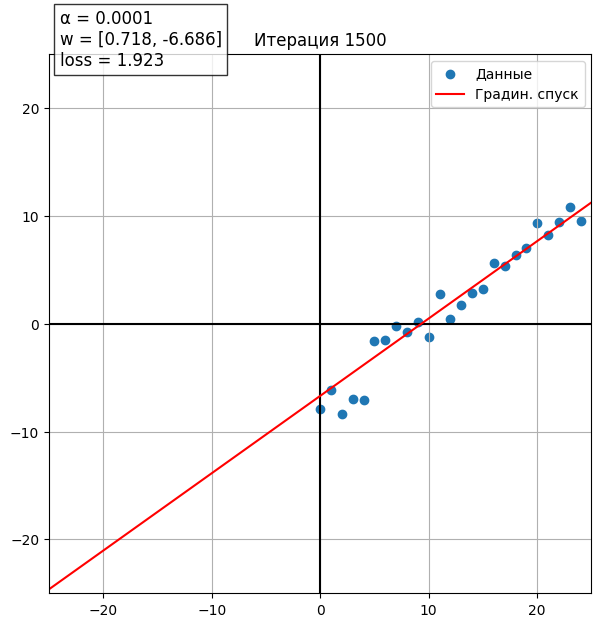

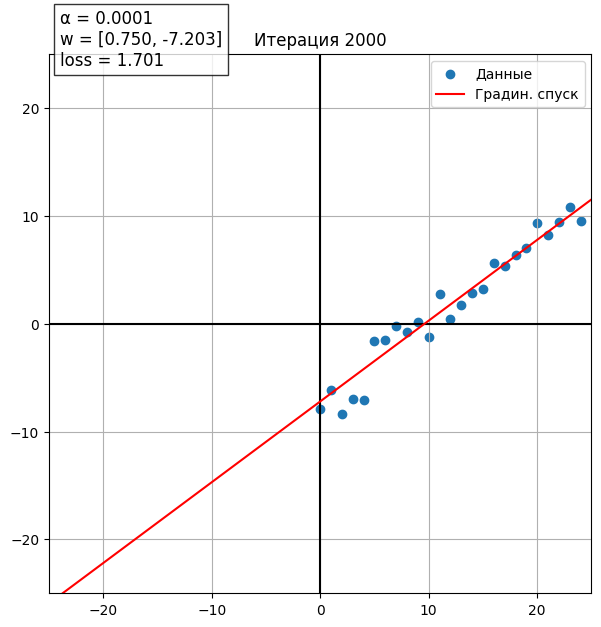

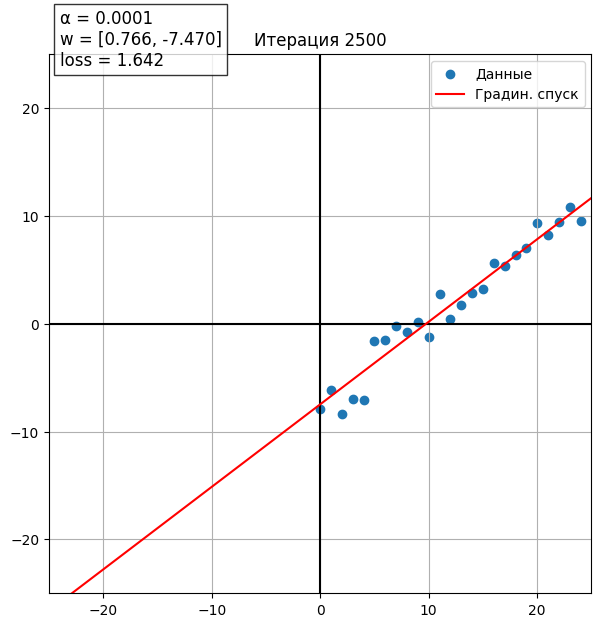

array([ 0.76592869, -7.47022147])

In [104]:
alpha = 0.0001
num_iter = 2500

w = np.array([0.0, 0.0])

for i in range(num_iter):
    # 1) получаем градиент
    grad = 2 * A.T @ (A @ w - y)
    # 2) получаем антиградиент и обновляем параметры
    w += -grad * alpha

    # mse
    loss = np.mean((A @ w - y) ** 2)

    if (i + 1) % 500 == 0 or i == 0:
        # Рисуем результат текущего шага
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.scatter(A[:, 0], y, label='Данные')
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.axvline(0, color='black')
        ax.axhline(0, color='black')
        ax.grid(True)

        # Линия, найденная градиентным спуском
        x1, x2 = -25, 25
        y1 = w[0] * x1 + w[1]
        y2 = w[0] * x2 + w[1]
        ax.plot([x1, x2], [y1, y2], 'r-', label='Градин. спуск')

        # Подпись α, w и loss
        text_str = (
            f'α = {alpha:.4f}\n'
            f'w = [{w[0]:.3f}, {w[1]:.3f}]\n'
            f'loss = {loss:.3f}'
        )
        ax.text(
            -24, 24, text_str,
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8)
        )

        ax.set_title(f'Итерация {i+1}')
        ax.legend()
        plt.show()


w